# Carga de datos

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [2]:
with open("berlin52.tsp", "r") as file:
    while True:
        line = file.readline()
        if line == "NODE_COORD_SECTION\n":
            break

    data = []

    while True:
        line = file.readline()
        if line == "EOF":
            break

        str_array = line.split()
        data.append(
            (float(str_array[1]), float(str_array[2]), int(str_array[0])))

In [3]:
len(data)

52

In [4]:
def euclidean(individual):
    i = 0
    total_distance = 0
    while i < len(individual) - 1:
        actual, nextt = individual[i], individual[i + 1]
        total_distance += math.dist(actual[0:2], nextt[0:2])
        i += 1
    total_distance += math.dist(individual[0][0:2],
                                individual[len(individual) - 1][0:2])
    return total_distance


def generate_population(population_size, data):
    population = []

    for _ in range(population_size):
        population.append(random.sample(data, len(data)))

    return population


def select_by_tournament(population, tournament_size, fitness_function):
    tournament = random.sample(population, tournament_size)
    individual = min(tournament, key=fitness_function)
    return individual


def crossover_two_points(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []

    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))

    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])

    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child


def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if (random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))

            city1 = individual[swapped]
            city2 = individual[swapWith]

            individual[swapped] = city2
            individual[swapWith] = city1
    return individual


class genetic_algorithm_class():
    def __init__(self,
                 crossover,
                 mutate,
                 selection_method,
                 fitness_function,
                 population_size=10,
                 elite_size=1,
                 tournament_proportion=0.3,
                 generations=100,
                 mutation_rate=0.01):
        self.crossover = crossover
        self.mutate = mutate
        self.selection_method = selection_method
        self.fitness_function = fitness_function
        self.population_size = population_size
        self.elite_size = elite_size
        self.tournament_proportion = tournament_proportion
        self.generations = generations
        self.mutation_rate = mutation_rate

    def sort_population_by_fitness(self, population):
        return sorted(population, key=self.fitness_function)

    def generate_population(self, data):
        population = []

        for _ in range(self.population_size):
            population.append(random.sample(data, len(data)))

        return population

    def make_next_generation(
        self,
        previous_population,
    ):
        next_generation = []
        sorted_by_fitness_population = self.sort_population_by_fitness(
            previous_population)
        population_size = len(previous_population)
        tournament_size = int(self.population_size *
                              self.tournament_proportion)

        for i in range(self.population_size - self.elite_size):
            father = select_by_tournament(sorted_by_fitness_population,
                                          tournament_size,
                                          self.fitness_function)
            mother = select_by_tournament(sorted_by_fitness_population,
                                          tournament_size,
                                          self.fitness_function)

            individual = self.crossover(father, mother)
            individual = self.mutate(individual, self.mutation_rate)
            next_generation.append(individual)

        if self.elite_size > 0:
            elite = sorted_by_fitness_population[:self.elite_size]
            next_generation.extend(elite)

        return next_generation

    def solve(self, data):
        population = self.generate_population(data)

        i = 1  # se itera una cantidad igual a la cantidad de generaciones definidas
        bestFitness = []
        while True:
            if i == self.generations:
                break

            i += 1

            population = self.make_next_generation(population)

            best_individual = self.sort_population_by_fitness(population)[0]
            bestFitness.append(self.fitness_function(best_individual))

        best_individual = self.sort_population_by_fitness(population)[0]
        return best_individual, bestFitness, population

    def __str__(self):
        result = "ga(population_size={}, elite_size={}, tournament_proportion={}, generations={}, mutation_rate={})"
        return result.format(self.population_size, self.elite_size,
                             self.tournament_proportion, self.generations,
                             self.mutation_rate)

In [5]:
ga = genetic_algorithm_class(crossover=crossover_two_points,
                             mutate=mutate,
                             selection_method=select_by_tournament,
                             fitness_function=euclidean,
                             population_size=50,
                             elite_size=1,
                             tournament_proportion=0.1,
                             generations=300,
                             mutation_rate=0.001)

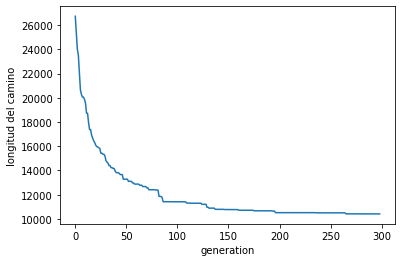

Distancia mínima: 10410.573714112805


In [6]:
best_individual, best_fitness, last_population = ga.solve(data)
plt.xlabel('generation')
plt.ylabel('longitud del camino')
plt.plot(best_fitness)
plt.show()
print("Distancia mínima:", ga.fitness_function(best_individual))

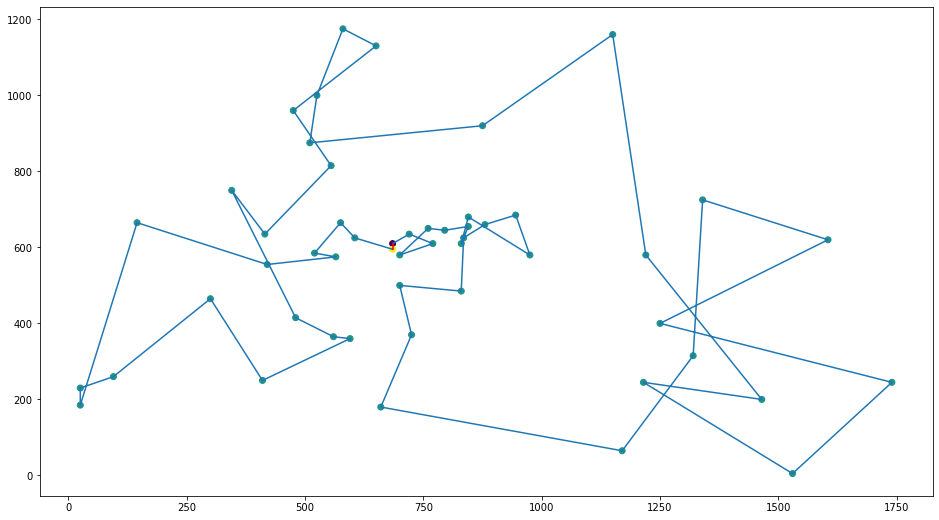

In [7]:
X = [city[0] for city in best_individual]
Y = [city[1] for city in best_individual]
city_numbers = [city[2] for city in best_individual]

colors = [0] + [1] * (len(best_individual) - 2) + [2]

plt.figure(figsize=(16, 9))
plt.plot(X, Y)
last_line_X = [X[len(X) - 1], X[0]]
last_line_Y = [Y[len(Y) - 1], Y[0]]
plt.plot(last_line_X, last_line_Y, color="red")
plt.scatter(X, Y, c=colors)
plt.show()

In [8]:
last_population_fitness = list(
    map(ga.fitness_function, ga.sort_population_by_fitness(last_population)))
last_population_fitness

[10410.573714112805,
 10495.248219769246,
 10708.77323516578,
 10945.472889593637,
 11101.192890764802,
 11113.036027286123,
 11241.392465044572,
 11252.751001809027,
 11276.323349707165,
 11375.402984011973,
 11386.4590593476,
 11397.77944163578,
 11398.342838891058,
 11399.654354997714,
 11421.750151346907,
 11447.743005120685,
 11465.38938674495,
 11496.244963021343,
 11526.043505213604,
 11541.76242235204,
 11554.703664898143,
 11556.763754001902,
 11557.704179553466,
 11725.677614040425,
 11727.120082199006,
 11754.536095336314,
 11769.07561684675,
 11827.692119419255,
 11888.424132185857,
 11937.603062278584,
 11965.429534050252,
 12032.697046702704,
 12080.430682538034,
 12098.978086717138,
 12108.96465031854,
 12109.812463790091,
 12125.62569170287,
 12281.320312221964,
 12390.988203412766,
 12452.69016953264,
 12460.205108314158,
 12619.923802156412,
 12643.568350841044,
 12665.211634074087,
 12829.430310636406,
 12870.47791956483,
 12881.230352620996,
 12892.663905231748,
 13